In [69]:
# supervised machine learning regression scenario

# Predicting Salary of Software Developers

## Data Collection

In [70]:
# Bringing in some general use case libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit

import warnings
warnings.filterwarnings('ignore')

In [71]:
# Read the data using pandas and make a copy
df = pd.read_csv('../datasets/full/2020/survey_results_public.csv', na_values='?', comment = '\t', sep=',', skipinitialspace=True)

# data = df.copy()

# Creating a new dataframe which only contains US data
data_us = df[df.Country == 'United States']

In [72]:
# Confirming the data read was successful
data_us.sample(10)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
34078,4569,I am a developer by profession,Yes,28.0,9,Yearly,135000.0,135000.0,United States,United States dollar,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Django,Angular.js;Django;jQuery;React.js,Just as welcome now as I felt last year,40.0,18,8
1670,2337,I am a developer by profession,No,24.0,17,NaN,NaN,NaN,United States,United States dollar,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET,ASP.NET,Just as welcome now as I felt last year,50.0,7,2
38216,61975,I am a developer by profession,Yes,27.0,15,Yearly,300000.0,300000.0,United States,United States dollar,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",NaN,NaN,Just as welcome now as I felt last year,55.0,10,9
45365,27627,I am a developer by profession,Yes,35.0,22,Yearly,60000.0,60000.0,United States,United States dollar,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",jQuery,jQuery,Just as welcome now as I felt last year,32.0,13,8
30887,5258,I am a developer by profession,Yes,42.0,7,Yearly,280000.0,280000.0,United States,United States dollar,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",NaN,NaN,Just as welcome now as I felt last year,50.0,25,22
33473,3005,I am a developer by profession,Yes,38.0,17,Yearly,145000.0,145000.0,United States,United States dollar,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Express;React.js,Express;jQuery;React.js;Spring;Vue.js,Just as welcome now as I felt last year,40.0,21,15
48826,28448,I am a developer by profession,Yes,30.0,12,Yearly,48000.0,48000.0,United States,United States dollar,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",Django;jQuery,Django;jQuery,Just as welcome now as I felt last year,40.0,18,8
38403,2943,I am a developer by profession,No,28.0,18,Yearly,93000.0,93000.0,United States,United States dollar,...,Neither easy nor difficult,Appropriate in length,No,"A natural science (such as biology, chemistry,...",Express;jQuery;React.js,jQuery,Just as welcome now as I felt last year,37.5,4,4
38197,24135,I am a developer by profession,Yes,26.0,19,Yearly,95000.0,95000.0,United States,United States dollar,...,Neither easy nor difficult,Too long,No,"Computer science, computer engineering, or sof...",Django;Flask;jQuery;React.js,Flask;jQuery,Just as welcome now as I felt last year,43.0,7,2
3349,1080,I am a developer by profession,Yes,NaN,12,NaN,NaN,NaN,United States,United States dollar,...,Neither easy nor difficult,Appropriate in length,No,Mathematics or statistics,ASP.NET Core;Ruby on Rails,ASP.NET;ASP.NET Core;Ruby on Rails,Somewhat less welcome now than last year,40.0,20,12


### Problem Statement:
The data contains ConvertedComp data which is continous data and tells us the total compensation of the developer.

The aim is to **predict the total compensation for a developer** given we have the feature variables for a potential candidate.

In [73]:
# Looking at information about the data
data_us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12469 entries, 4 to 60708
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    12469 non-null  int64  
 1   MainBranch                    12438 non-null  object 
 2   Hobbyist                      12469 non-null  object 
 3   Age                           9619 non-null   float64
 4   Age1stCode                    11785 non-null  object 
 5   CompFreq                      8643 non-null   object 
 6   CompTotal                     8341 non-null   float64
 7   ConvertedComp                 8354 non-null   float64
 8   Country                       12469 non-null  object 
 9   CurrencyDesc                  9767 non-null   object 
 10  CurrencySymbol                9767 non-null   object 
 11  DatabaseDesireNextYear        8479 non-null   object 
 12  DatabaseWorkedWith            9763 non-null   object 
 13  D

In [74]:
# Data set contains 60 columns, we only want to focus on some of those

pd.options.mode.chained_assignment = None  # default='warn'

data_us.drop(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq', 'CompTotal' ,'CurrencyDesc', 'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith', 'DevType', 'Employment', 'Ethnicity', 'Gender', 'JobFactors', 'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith', 'MiscTechDesireNextYear', 'MiscTechWorkedWith', 'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps', 'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch', 'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms', 'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites', 'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear', 'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount', 'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength', 'Trans', 'UndergradMajor', 'WebframeDesireNextYear', 'WebframeWorkedWith', 'WelcomeChange', 'WorkWeekHrs', 'YearsCodePro'], axis=1, inplace=True)

In [75]:
# Looking at information about the data after dropping some columns (returns 12,469 rows)
data_us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12469 entries, 4 to 60708
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ConvertedComp  8354 non-null   float64
 1   Country        12469 non-null  object 
 2   EdLevel        11804 non-null  object 
 3   YearsCode      11759 non-null  object 
dtypes: float64(1), object(3)
memory usage: 487.1+ KB


In [76]:
data_us.sample(20)

,ConvertedComp,Country,EdLevel,YearsCode
33173,150000.0,United States,Some college/university study without earning ...,17
2784,NaN,United States,"Bachelor's degree (B.A., B.S., B.Eng., etc.)",12
33145,150000.0,United States,"Bachelor's degree (B.A., B.S., B.Eng., etc.)",14
1461,NaN,United States,"Bachelor's degree (B.A., B.S., B.Eng., etc.)",6
33666,140000.0,United States,"Master's degree (M.A., M.S., M.Eng., MBA, etc.)",9
1607,NaN,United States,"Master's degree (M.A., M.S., M.Eng., MBA, etc.)",6
49785,21000.0,United States,Some college/university study without earning ...,Less than 1 year
37397,100000.0,United States,"Bachelor's degree (B.A., B.S., B.Eng., etc.)",5
9116,NaN,United States,NaN,NaN
84,NaN,United States,"Bachelor's degree (B.A., B.S., B.Eng., etc.)",1


In [77]:
# Checking the counts of null values in the US data
data_us.isnull().sum()

ConvertedComp    4115
Country             0
EdLevel           665
YearsCode         710
dtype: int64

In [78]:
# Analyzing only data where target variable is reported in survey
data_us.dropna(subset=['ConvertedComp'], inplace=True)
data_us.isnull().sum()

ConvertedComp     0
Country           0
EdLevel           1
YearsCode        20
dtype: int64

In [79]:
# Analyzing only data where feature variable is reported in survey
data_us.dropna(subset=['YearsCode'], inplace=True)
data_us.isnull().sum()

ConvertedComp    0
Country          0
EdLevel          0
YearsCode        0
dtype: int64

In [80]:
# Analyzing only data where feature variable is reported in survey
data_us.dropna(subset=['EdLevel'], inplace=True)
data_us.isnull().sum()

ConvertedComp    0
Country          0
EdLevel          0
YearsCode        0
dtype: int64

In [81]:
# Looking at information about the data after dropping some rows (returns 8,081 rows)
data_us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8334 entries, 2303 to 60708
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ConvertedComp  8334 non-null   float64
 1   Country        8334 non-null   object 
 2   EdLevel        8334 non-null   object 
 3   YearsCode      8334 non-null   object 
dtypes: float64(1), object(3)
memory usage: 325.5+ KB


In [82]:
data_us.sample(20)

,ConvertedComp,Country,EdLevel,YearsCode
34084,135000.0,United States,Some college/university study without earning ...,18
37718,99700.0,United States,"Professional degree (JD, MD, etc.)",26
33717,100000.0,United States,"Bachelor's degree (B.A., B.S., B.Eng., etc.)",10
33082,150000.0,United States,"Bachelor's degree (B.A., B.S., B.Eng., etc.)",8
31761,190000.0,United States,Some college/university study without earning ...,26
41838,75000.0,United States,"Bachelor's degree (B.A., B.S., B.Eng., etc.)",15
40278,81000.0,United States,"Bachelor's degree (B.A., B.S., B.Eng., etc.)",40
39127,89000.0,United States,"Bachelor's degree (B.A., B.S., B.Eng., etc.)",17
34012,95000.0,United States,"Bachelor's degree (B.A., B.S., B.Eng., etc.)",10
39789,85000.0,United States,"Master's degree (M.A., M.S., M.Eng., MBA, etc.)",16


In [83]:
data_us.describe()

,ConvertedComp
count,8334.000000
mean,123608.950924
std,67073.724327
min,7500.000000
25%,80000.000000
50%,110000.000000
75%,150000.000000
max,650000.000000


<AxesSubplot:xlabel='ConvertedComp'>

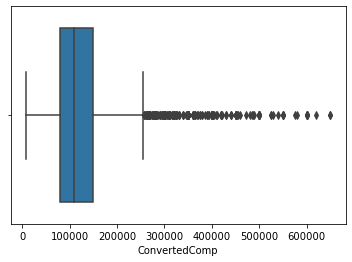

In [84]:
sns.boxplot(x=data_us['ConvertedComp'])

In [85]:
data_us['YearsCode'] = data_us['YearsCode'].replace(['More than 50 years', 'Less than 1 year'], ['51', '0'])

In [86]:
data_us['ConvertedComp'].value_counts()

120000.0    360
100000.0    308
150000.0    282
110000.0    254
130000.0    220
           ... 
46513.0       1
97800.0       1
97125.0       1
70008.0       1
226574.0      1
Name: ConvertedComp, Length: 800, dtype: int64

In [87]:
# category distribution, looking for unique values
data_us['YearsCode'].value_counts()

10    654
20    486
6     424
8     424
7     413
5     391
15    382
12    357
25    300
9     279
4     256
11    232
14    231
13    220
16    220
30    213
3     212
18    196
17    186
22    169
40    161
35    137
23    137
2     129
21    126
19    120
24    111
26     95
0      87
38     85
51     72
27     72
28     68
37     67
1      61
36     58
32     58
34     56
42     48
29     45
33     37
45     36
31     34
43     32
41     30
39     29
44     24
48     18
47     17
49     14
46     14
50     11
Name: YearsCode, dtype: int64

In [88]:
# category distribution, looking for unique values
data_us['EdLevel'].value_counts()

Bachelor's degree (B.A., B.S., B.Eng., etc.)                                          4799
Master's degree (M.A., M.S., M.Eng., MBA, etc.)                                       1542
Some college/university study without earning a degree                                 965
Associate degree (A.A., A.S., etc.)                                                    436
Other doctoral degree (Ph.D., Ed.D., etc.)                                             303
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     193
Professional degree (JD, MD, etc.)                                                      43
I never completed any formal education                                                  30
Primary/elementary school                                                               23
Name: EdLevel, dtype: int64

In [89]:
# Making sure data is floats and/or ints (ignoring Country)
data_us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8334 entries, 2303 to 60708
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ConvertedComp  8334 non-null   float64
 1   Country        8334 non-null   object 
 2   EdLevel        8334 non-null   object 
 3   YearsCode      8334 non-null   object 
dtypes: float64(1), object(3)
memory usage: 325.5+ KB


In [90]:
data_us['YearsCode'] = data_us['YearsCode'].astype(str).astype(int)

0 - I never completed any formal education    
1 - Primary/elementary school           
2 - Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)
3 - Some college/university study without earning a degree    
4 - Associate degree (A.A., A.S., etc.)         
5 - Bachelor’s degree (B.A., B.S., B.Eng., etc.)
6 - Master’s degree (M.A., M.S., M.Eng., MBA, etc.)         
7 - Professional degree (JD, MD, etc.)          
8 - Other doctoral degree (Ph.D., Ed.D., etc.)   

In [94]:
data_us['EdLevel'] = data_us['EdLevel'].replace(['I never completed any formal education', 'Primary/elementary school', 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)', 'Some college/university study without earning a degree', 'Associate degree (A.A., A.S., etc.)', "Bachelor's degree (B.A., B.S., B.Eng., etc.)", "Master's degree (M.A., M.S., M.Eng., MBA, etc.)", 'Professional degree (JD, MD, etc.)', 'Other doctoral degree (Ph.D., Ed.D., etc.)'], ['0', '1', '2', '3', '4', '5', '6', '7', '8'])

In [95]:
data_us['EdLevel'] = data_us['EdLevel'].astype(str).astype(int)

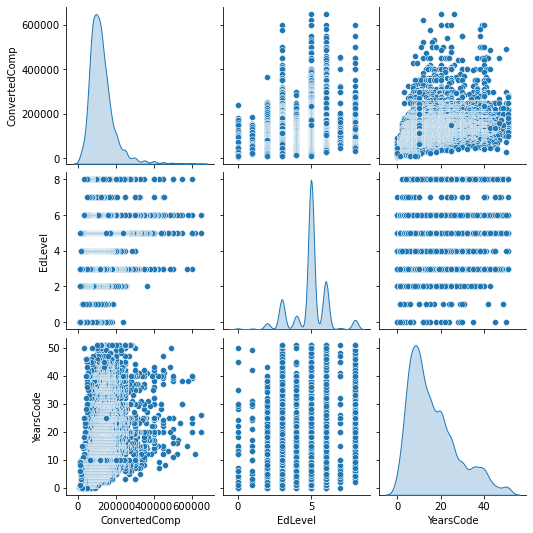

In [96]:
# pairplots to get an overview of potential correlations in the data
sns.pairplot(data_us[['ConvertedComp', 'EdLevel', 'YearsCode']], diag_kind='kde')

In [97]:
# Making sure data is floats and/or ints (ignoring Country), and that there are no null values
data_us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8334 entries, 2303 to 60708
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ConvertedComp  8334 non-null   float64
 1   Country        8334 non-null   object 
 2   EdLevel        8334 non-null   int64  
 3   YearsCode      8334 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 325.5+ KB


In [98]:
data_us.describe()

,ConvertedComp,EdLevel,YearsCode
count,8334.000000,8334.000000,8334.000000
mean,123608.950924,4.922006,16.448884
std,67073.724327,1.176865,11.273445
min,7500.000000,0.000000,0.000000
25%,80000.000000,5.000000,8.000000
50%,110000.000000,5.000000,14.000000
75%,150000.000000,5.000000,22.000000
max,650000.000000,8.000000,51.000000


In [99]:
# Creating a save point to protect the data so far
data_us.to_csv('../datasets/views/2020/data-us-2020.csv', index=False)

## Working on the machine learning model with scikit-learn